In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [355]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [356]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [357]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558360 entries, 0 to 1558359
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1558360 non-null  int64  
 1   kWh       1558360 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.8 MB


In [358]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1558355    0.19
1558356    0.19
1558357    0.19
1558358    0.17
1558359    0.13
Name: kWh, Length: 1558360, dtype: float64

In [359]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1558355    0.19
1558356    0.19
1558357    0.19
1558358    0.17
1558359    0.13
Name: kWh, Length: 1558360, dtype: float64

In [360]:
l=len(conso_data)-1
l

1558359

In [361]:
conso_data['sec']=conso_data['Interval']/1000


In [362]:
conso_data['Wh']=3600000/conso_data['Interval']


In [363]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [364]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558360 entries, 0 to 1558359
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1558360 non-null  int64  
 1   kWh        1558360 non-null  float64
 2   sec        1558360 non-null  float64
 3   Wh         1558360 non-null  float64
 4   cumul(ms)  1558360 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 59.4 MB


In [365]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1558355,19092,0.19,19.092,188.560654,38587698162
1558356,19058,0.19,19.058,188.897051,38587717220
1558357,19117,0.19,19.117,188.314066,38587736337
1558358,20598,0.17,20.598,174.774250,38587756935
1558359,28088,0.13,28.088,128.168613,38587785023


In [366]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

38587785023000

In [367]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 50, 36, 118129)

In [368]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [369]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [370]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [371]:
conso_data['dates']

0         2023-08-21 18:50:58.052129
1         2023-08-21 18:51:19.910129
2         2023-08-21 18:51:41.911129
3         2023-08-21 18:52:03.839129
4         2023-08-21 18:52:25.730129
                     ...            
1558355   2024-11-10 09:38:54.280129
1558356   2024-11-10 09:39:13.338129
1558357   2024-11-10 09:39:32.455129
1558358   2024-11-10 09:39:53.053129
1558359   2024-11-10 09:40:21.141129
Name: dates, Length: 1558360, dtype: datetime64[ns]

## créer les dates

In [372]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:50:58.052129,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:51:19.910129,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:51:41.911129,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:52:03.839129,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:52:25.730129,21/08/23
...,...,...,...,...,...,...,...
1558355,19092,0.19,19.092,188.560654,38587698162,2024-11-10 09:38:54.280129,10/11/24
1558356,19058,0.19,19.058,188.897051,38587717220,2024-11-10 09:39:13.338129,10/11/24
1558357,19117,0.19,19.117,188.314066,38587736337,2024-11-10 09:39:32.455129,10/11/24
1558358,20598,0.17,20.598,174.774250,38587756935,2024-11-10 09:39:53.053129,10/11/24


### save conso_data with dates

In [373]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [374]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('10/11/24', 10, 11, 2024)

In [375]:
here = now.strftime('%H:%M:%S')
here

'09:40:53'

In [376]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [377]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1163 entries, 1557197 to 1558359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1163 non-null   int64         
 1   kWh        1163 non-null   float64       
 2   sec        1163 non-null   float64       
 3   Wh         1163 non-null   float64       
 4   cumul(ms)  1163 non-null   int64         
 5   dates      1163 non-null   datetime64[ns]
 6   days       1163 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 72.7+ KB


In [378]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [379]:
data = list(df_grp['kWh'])
print(data)

[0.864, 3.699, 4.231, 3.686, 4.196, 4.626, 3.501, 3.401, 3.53, 3.683, 3.812, 3.746, 4.257, 3.836, 3.439, 3.634, 3.326, 3.442, 4.242, 4.001, 4.054, 3.914, 3.436, 4.476, 3.712, 3.772, 4.429, 4.666, 3.756, 3.221, 3.174, 4.03, 3.647, 3.179, 3.794, 4.173, 3.74, 3.56, 4.799, 4.176, 4.543, 3.773, 3.392, 4.312, 3.88, 3.873, 3.434, 4.075, 3.652, 3.405, 4.117, 3.394, 3.889, 3.832, 3.646, 3.75, 4.244, 3.29, 3.874, 2.967, 2.057, 2.044, 2.464, 4.091, 3.736, 4.323, 3.632, 3.901, 3.749, 3.944, 3.954, 4.128, 3.631, 3.171, 3.795, 3.55, 3.592, 3.7, 3.688, 3.237, 3.907, 3.262, 3.748, 3.592, 4.092, 3.607, 3.338, 3.825, 4.063, 4.385, 4.081, 3.999, 4.221, 3.749, 3.926, 3.874, 3.911, 3.75, 4.04, 4.338, 3.884, 3.522, 3.667, 3.674, 3.337, 3.853, 3.989, 4.11, 3.474, 4.175, 3.606, 4.11, 4.509, 3.686, 3.419, 3.583, 4.185, 3.667, 4.079, 3.982, 3.748, 3.587, 5.135, 3.701, 3.759, 4.304, 4.088, 4.763, 4.393, 3.958, 3.793, 4.364, 4.656, 4.223, 4.78, 4.342, 3.68, 4.223, 3.686, 3.624, 3.524, 3.962, 3.65, 3.788, 3.59, 3.

In [380]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [381]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [382]:
df = conso_data
len(df)

1558360

In [383]:
period(p=2)

2023-08-22 00:57:11.855129	2023-08-22 08:01:27.475129	7h 4m 15s 	2000


In [384]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.292115
dtype: float64

In [385]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.478482
dtype: float64

In [386]:
last=df_grp.iloc[-1]['kWh']
last

1.163

In [387]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1163 entries, 1557197 to 1558359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1163 non-null   int64         
 1   kWh        1163 non-null   float64       
 2   sec        1163 non-null   float64       
 3   Wh         1163 non-null   float64       
 4   cumul(ms)  1163 non-null   int64         
 5   dates      1163 non-null   datetime64[ns]
 6   days       1163 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 72.7+ KB


In [388]:
# select day
day = today
#day = '16/08/24'


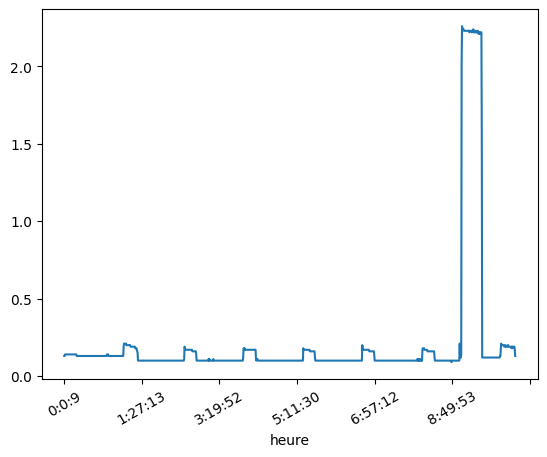

In [389]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [390]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:50:58.052129,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:51:19.910129,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:51:41.911129,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:52:03.839129,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:52:25.730129,21/08/23
...,...,...,...,...,...,...,...
1558355,19092,0.19,19.092,188.560654,38587698162,2024-11-10 09:38:54.280129,10/11/24
1558356,19058,0.19,19.058,188.897051,38587717220,2024-11-10 09:39:13.338129,10/11/24
1558357,19117,0.19,19.117,188.314066,38587736337,2024-11-10 09:39:32.455129,10/11/24
1558358,20598,0.17,20.598,174.774250,38587756935,2024-11-10 09:39:53.053129,10/11/24


In [391]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:9,26829,0.13,26.829,134.183160,38552973255,2024-11-10 00:00:09.373129,10/11/24
0:0:36,26859,0.13,26.859,134.033285,38553000114,2024-11-10 00:00:36.232129,10/11/24
0:1:1,25669,0.14,25.669,140.246991,38553025783,2024-11-10 00:01:01.901129,10/11/24
0:1:27,25408,0.14,25.408,141.687657,38553051191,2024-11-10 00:01:27.309129,10/11/24
0:1:52,25596,0.14,25.596,140.646976,38553076787,2024-11-10 00:01:52.905129,10/11/24
...,...,...,...,...,...,...,...
9:38:54,19092,0.19,19.092,188.560654,38587698162,2024-11-10 09:38:54.280129,10/11/24
9:39:13,19058,0.19,19.058,188.897051,38587717220,2024-11-10 09:39:13.338129,10/11/24
9:39:32,19117,0.19,19.117,188.314066,38587736337,2024-11-10 09:39:32.455129,10/11/24


In [392]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 02/11/24 4.085
Min : 11/10/24 1.786


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1557197,26829,0.13,26.829,134.183160,38552973255,2024-11-10 00:00:09.373129,10/11/24,0:0:9
1557198,26859,0.13,26.859,134.033285,38553000114,2024-11-10 00:00:36.232129,10/11/24,0:0:36
1557199,25669,0.14,25.669,140.246991,38553025783,2024-11-10 00:01:01.901129,10/11/24,0:1:1
1557200,25408,0.14,25.408,141.687657,38553051191,2024-11-10 00:01:27.309129,10/11/24,0:1:27
1557201,25596,0.14,25.596,140.646976,38553076787,2024-11-10 00:01:52.905129,10/11/24,0:1:52
...,...,...,...,...,...,...,...,...
1558355,19092,0.19,19.092,188.560654,38587698162,2024-11-10 09:38:54.280129,10/11/24,9:38:54
1558356,19058,0.19,19.058,188.897051,38587717220,2024-11-10 09:39:13.338129,10/11/24,9:39:13
1558357,19117,0.19,19.117,188.314066,38587736337,2024-11-10 09:39:32.455129,10/11/24,9:39:32
1558358,20598,0.17,20.598,174.774250,38587756935,2024-11-10 09:39:53.053129,10/11/24,9:39:53


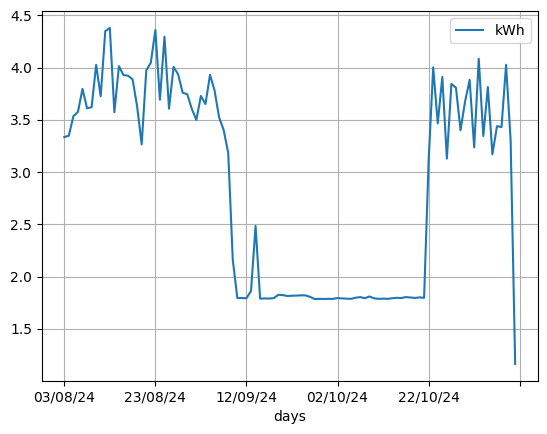

In [393]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-10 00:00:09.373129	2024-11-10 08:49:17.906129	8h 49m 8s 	1000
2024-11-10 08:49:17.906129	2024-11-10 09:40:21.141129	0h 51m 3s 	163
<class 'pandas.core.frame.DataFrame'>
Index: 1163 entries, 1557197 to 1558359
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1163 non-null   int64         
 1   kWh        1163 non-null   float64       
 2   sec        1163 non-null   float64       
 3   Wh         1163 non-null   float64       
 4   cumul(ms)  1163 non-null   int64         
 5   dates      1163 non-null   datetime64[ns]
 6   days       1163 non-null   object        
 7   heure      1163 non-null   object        
 8   hours      1163 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 90.9+ KB


('10/11/24', <Axes: xlabel='hours'>)

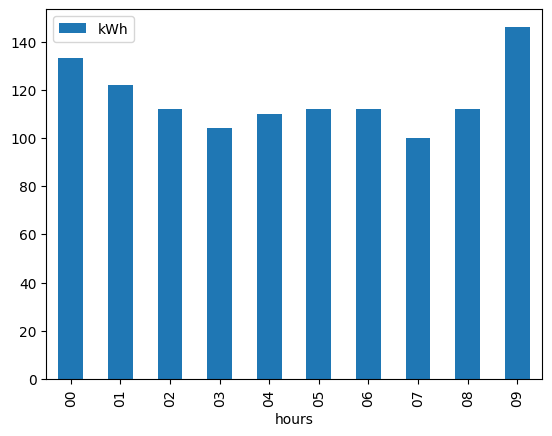

In [394]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [395]:
df_grp

,kWh
days,
21/08/23,0.864
22/08/23,3.699
23/08/23,4.231
24/08/23,3.686
25/08/23,4.196
...,...
06/11/24,3.439
07/11/24,3.431
08/11/24,4.027


In [396]:
# select number of days to display
span = 30
#df_grp.tail(span)


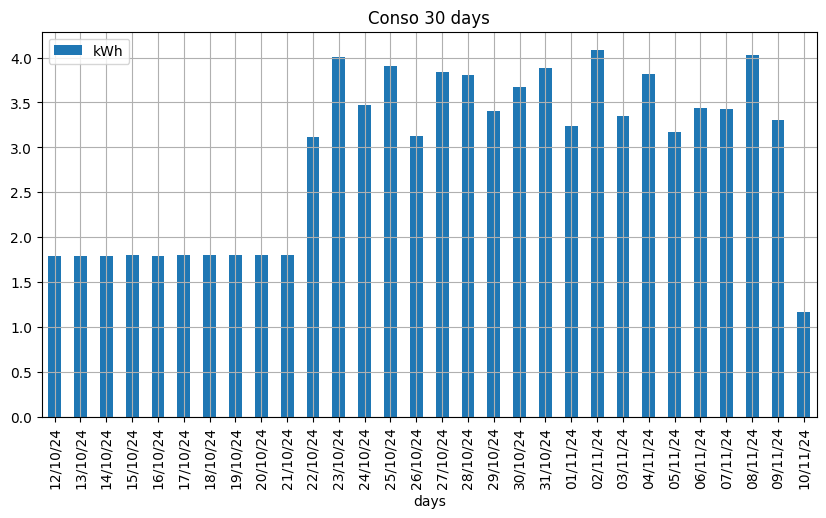

In [397]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


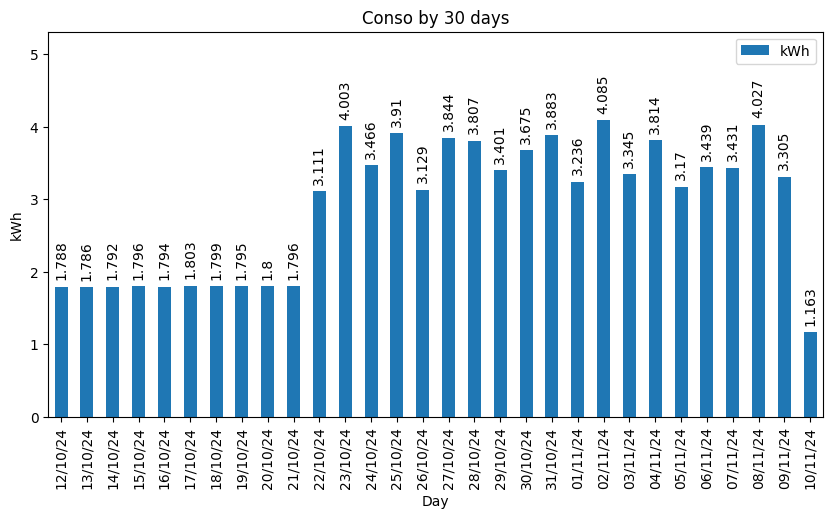

In [398]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [399]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
12/10/24    1.788
13/10/24    1.786
14/10/24    1.792
15/10/24    1.796
16/10/24    1.794
17/10/24    1.803
18/10/24    1.799
19/10/24    1.795
20/10/24    1.800
21/10/24    1.796
22/10/24    3.111
23/10/24    4.003
24/10/24    3.466
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.675
31/10/24    3.883
01/11/24    3.236
02/11/24    4.085
03/11/24    3.345
04/11/24    3.814
05/11/24    3.170
06/11/24    3.439
07/11/24    3.431
08/11/24    4.027
09/11/24    3.305
10/11/24    1.163
Name: kWh, dtype: float64

In [400]:
x_labels=df_grp.tail(span).index
x_labels

Index(['12/10/24', '13/10/24', '14/10/24', '15/10/24', '16/10/24', '17/10/24',
       '18/10/24', '19/10/24', '20/10/24', '21/10/24', '22/10/24', '23/10/24',
       '24/10/24', '25/10/24', '26/10/24', '27/10/24', '28/10/24', '29/10/24',
       '30/10/24', '31/10/24', '01/11/24', '02/11/24', '03/11/24', '04/11/24',
       '05/11/24', '06/11/24', '07/11/24', '08/11/24', '09/11/24', '10/11/24'],
      dtype='object', name='days')

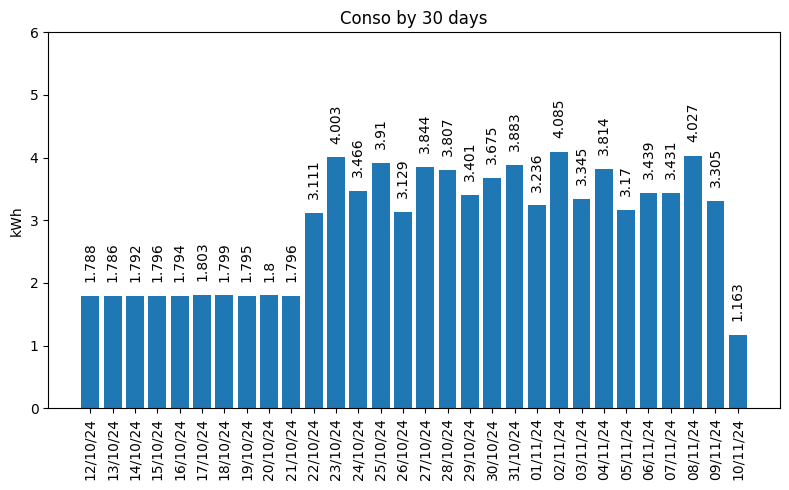

In [401]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [402]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

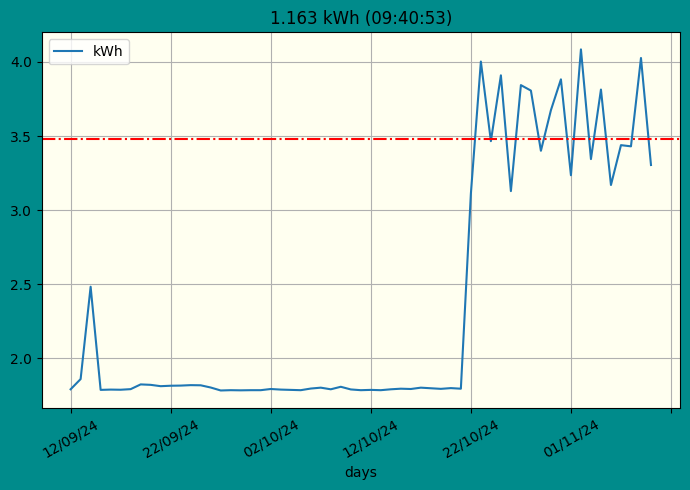

In [403]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

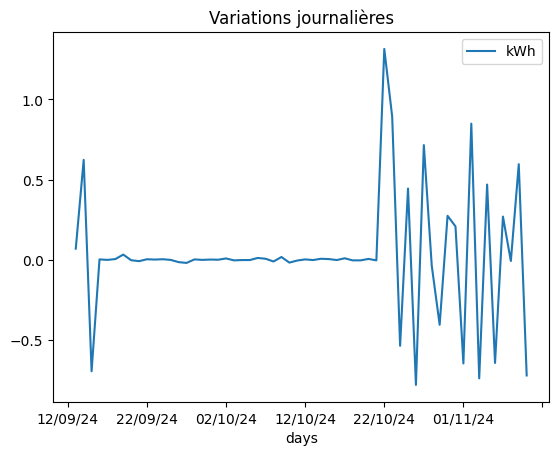

In [404]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [405]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:50:58.052129,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:51:19.910129,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:51:41.911129,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:52:03.839129,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:52:25.730129,21/08/23,18
...,...,...,...,...,...,...,...,...
1558355,19092,0.19,19.092,188.560654,38587698162,2024-11-10 09:38:54.280129,10/11/24,09
1558356,19058,0.19,19.058,188.897051,38587717220,2024-11-10 09:39:13.338129,10/11/24,09
1558357,19117,0.19,19.117,188.314066,38587736337,2024-11-10 09:39:32.455129,10/11/24,09
1558358,20598,0.17,20.598,174.774250,38587756935,2024-11-10 09:39:53.053129,10/11/24,09


In [406]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [407]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [408]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [409]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,864
22/08/23,3699
23/08/23,4231
24/08/23,3686
25/08/23,4196
...,...
06/11/24,3439
07/11/24,3431
08/11/24,4027


In [411]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:50:58.052129,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:51:19.910129,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:51:41.911129,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:52:03.839129,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:52:25.730129,21/08/23,18
...,...,...,...,...,...,...,...,...
1558355,19092,0.19,19.092,188.560654,38587698162,2024-11-10 09:38:54.280129,10/11/24,09
1558356,19058,0.19,19.058,188.897051,38587717220,2024-11-10 09:39:13.338129,10/11/24,09
1558357,19117,0.19,19.117,188.314066,38587736337,2024-11-10 09:39:32.455129,10/11/24,09
1558358,20598,0.17,20.598,174.774250,38587756935,2024-11-10 09:39:53.053129,10/11/24,09


In [412]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
               4        21/08/23    18  0.16
...                          ...   ...   ...
10/11/24 09    1558355  10/11/24    09  0.19
               1558356  10/11/24    09  0.19
               1558357  10/11/24    09  0.19
               1558358  10/11/24    09  0.17
               1558359  10/11/24    09  0.13

[1558360 rows x 3 columns]

In [413]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [414]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [415]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,864,864
22/08/23,3699,3699
23/08/23,4231,4231
24/08/23,3686,3686
25/08/23,4196,4196
...,...,...
06/11/24,3439,3439
07/11/24,3431,3431
08/11/24,4027,4027


In [416]:
grp_by_day['kWh'].cumsum()

days
21/08/23        864
22/08/23       4563
23/08/23       8794
24/08/23      12480
25/08/23      16676
             ...   
06/11/24    1546434
07/11/24    1549865
08/11/24    1553892
09/11/24    1557197
10/11/24    1558360
Name: kWh, Length: 448, dtype: int64

In [417]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18      25
         19     249
         20     199
         21     130
         22     130
...             ...
10/11/24 05     112
         06     112
         07     100
         08     112
         09     146

[10720 rows x 1 columns]

In [418]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18            25
          19           274
          20           473
          21           603
          22           733
                    ...   
10/11/24  05       1557890
          06       1558002
          07       1558102
          08       1558214
          09       1558360
Name: kWh, Length: 10720, dtype: int64

In [419]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      25      25    NaN
         19     249     274  224.0
         20     199     473  -50.0
         21     130     603  -69.0
         22     130     733    0.0
...             ...     ...    ...
10/11/24 05     112     693    2.0
         06     112     805    0.0
         07     100     905  -12.0
         08     112    1017   12.0
         09     146    1163   34.0

[10720 rows x 3 columns]

In [420]:
today, grp_by_dayhours.loc[today]

('10/11/24',
        kWh  cumsum  diff
 hours                   
 00     133     133   NaN
 01     122     255 -11.0
 02     112     367 -10.0
 03     104     471  -8.0
 04     110     581   6.0
 05     112     693   2.0
 06     112     805   0.0
 07     100     905 -12.0
 08     112    1017  12.0
 09     146    1163  34.0)

Text(0.5, 1.0, 'Cumul journalier')

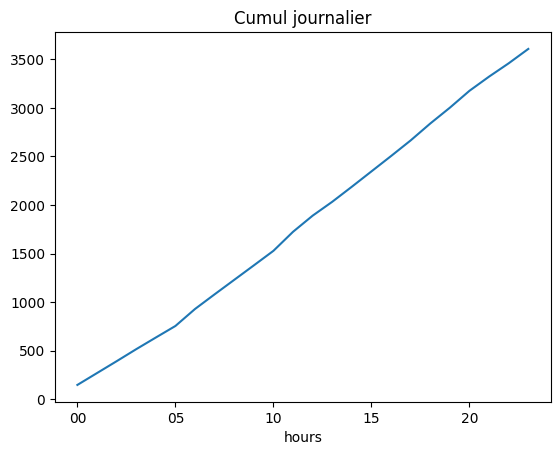

In [421]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

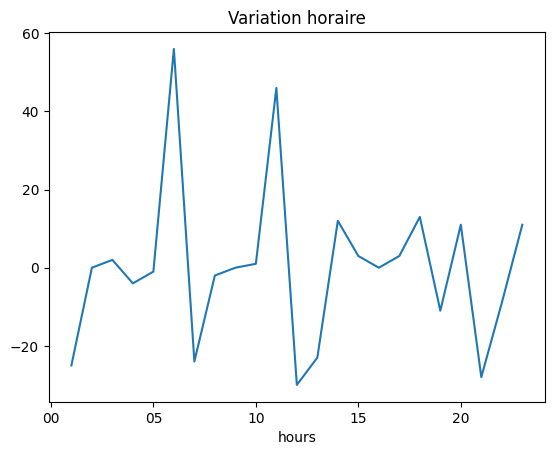

In [422]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [423]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

448

Text(0.5, 1.0, '448 days')

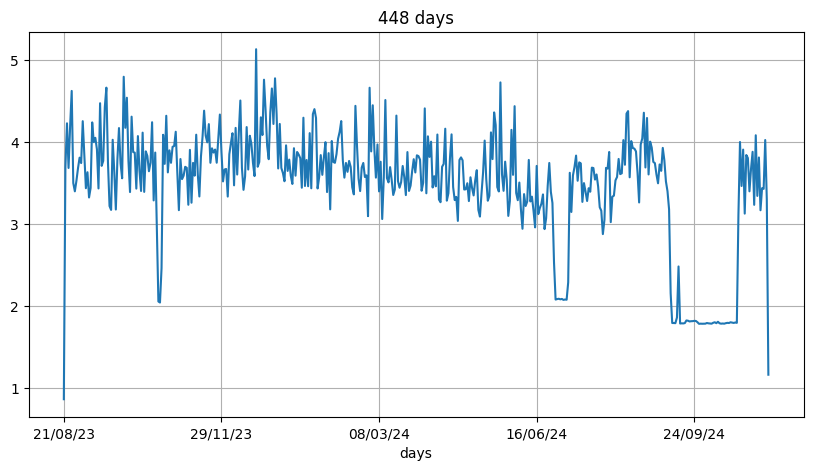

In [424]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

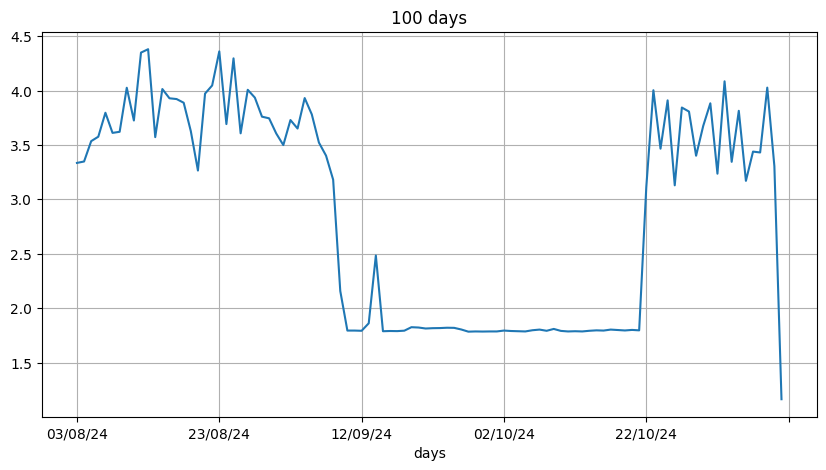

In [425]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [426]:
df_grp['kWh']

days
21/08/23    0.864
22/08/23    3.699
23/08/23    4.231
24/08/23    3.686
25/08/23    4.196
            ...  
06/11/24    3.439
07/11/24    3.431
08/11/24    4.027
09/11/24    3.305
10/11/24    1.163
Name: kWh, Length: 448, dtype: float64

In [427]:
df_grp.describe()

,kWh
count,448.000000
mean,3.478482
std,0.719061
min,0.864000
25%,3.335750
50%,3.616000
75%,3.881500
max,5.135000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

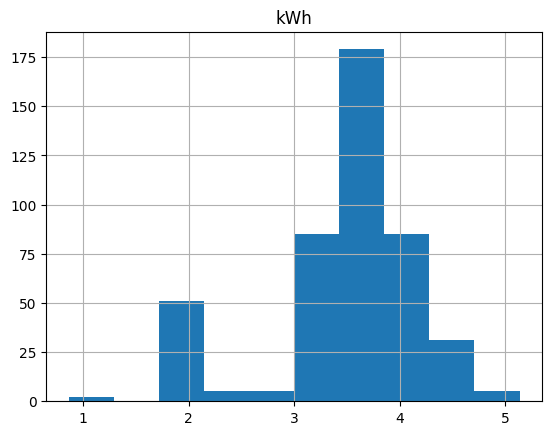

In [428]:
# 
df_grp.hist()

In [429]:
df_grp.tail(span)['kWh']

days
03/08/24    3.335
04/08/24    3.348
05/08/24    3.535
06/08/24    3.576
07/08/24    3.796
            ...  
06/11/24    3.439
07/11/24    3.431
08/11/24    4.027
09/11/24    3.305
10/11/24    1.163
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [430]:
day

'10/11/24'

In [431]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,133,133,NaN
01,122,255,-11.0
02,112,367,-10.0
03,104,471,-8.0
04,110,581,6.0
05,112,693,2.0
06,112,805,0.0
07,100,905,-12.0
08,112,1017,12.0


In [302]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


10

In [303]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 11)

In [304]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [305]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [306]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
Name: days, dtype: float64

In [307]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [308]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 00 to 09
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     10 non-null     int64  
 1   cumsum  10 non-null     int64  
 2   diff    9 non-null      float64
 3   days    10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 400.0+ bytes


In [309]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
Name: days, dtype: float64

In [310]:
day

'10/11/24'

In [311]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,133,133,NaN,1.0
01,122,255,-11.0,2.0
02,112,367,-10.0,3.0
03,104,471,-8.0,4.0
04,110,581,6.0,5.0
05,112,693,2.0,6.0
06,112,805,0.0,7.0
07,100,905,-12.0,8.0
08,112,1017,12.0,9.0


Text(0.5, 1.0, '10/11/24')

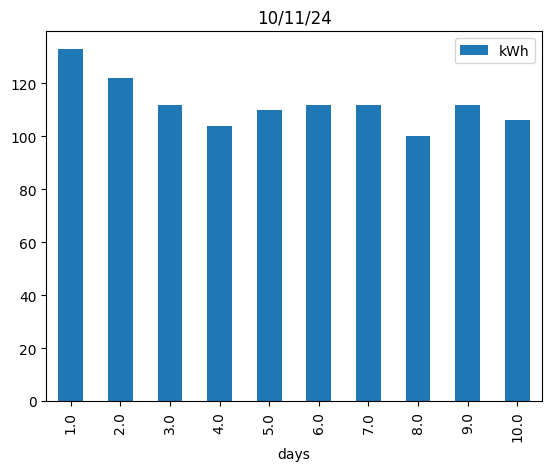

In [312]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [313]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09'], dtype='object', name='hours')

# Conso du jour


In [314]:
groupedbyhour.count()

,kWh
hours,
00,133
01,122
02,112
03,104
04,110
05,112
06,112
07,100
08,112


In [342]:
day = '09/09/24'
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    109
01    101
02    101
03    105
04    195
05    139
06    128
07     90
08     74
09     73
10     73
11     74
12     73
13     72
14     73
15     73
16     74
17     74
18     76
19     76
20     76
21     77
22     76
23     77
Name: kWh, dtype: int64

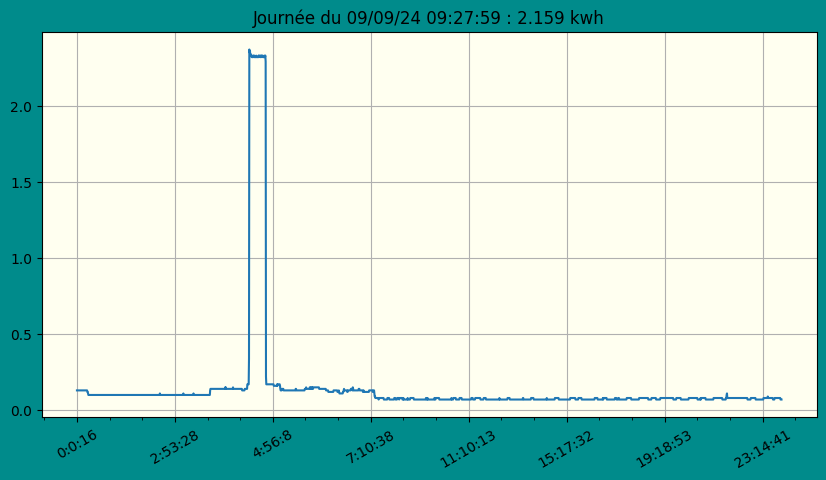

In [343]:
show(day,bgcolor='ivory')

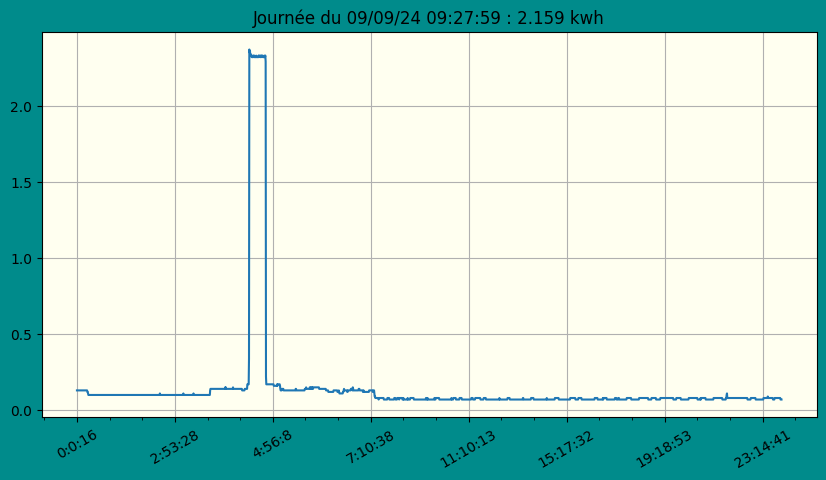

In [317]:
show(day,bgcolor='ivory')

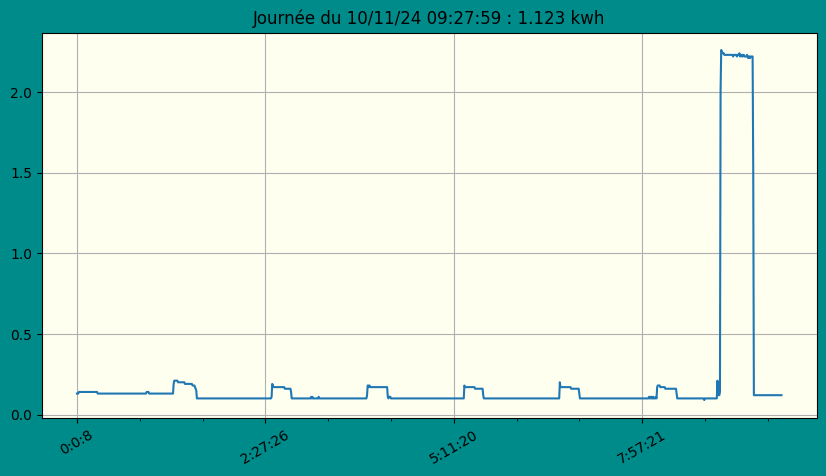

In [318]:
# retour vietnam 22/10/2024
show(today,bgcolor='ivory')

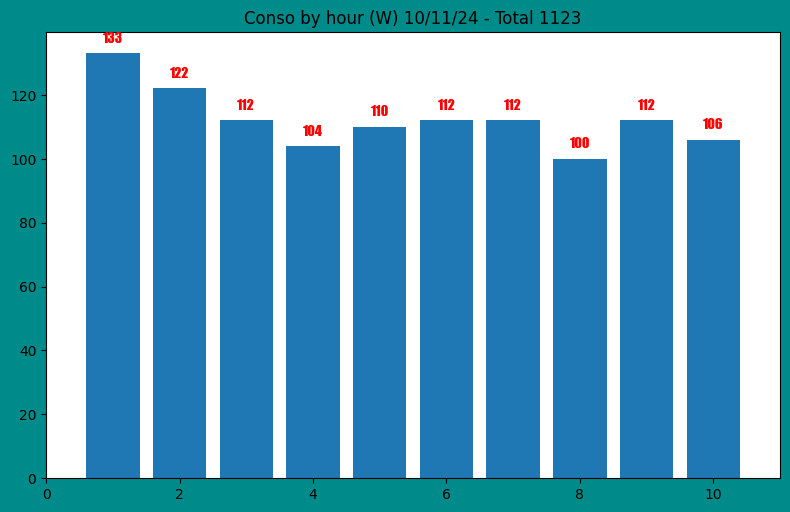

In [319]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_dayhours.loc[today].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today} - Total {sum(data)}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [320]:
sum(data)

1123

In [321]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,133,133,NaN,1.0
01,122,255,-11.0,2.0
02,112,367,-10.0,3.0
03,104,471,-8.0,4.0
04,110,581,6.0,5.0
05,112,693,2.0,6.0
06,112,805,0.0,7.0
07,100,905,-12.0,8.0
08,112,1017,12.0,9.0


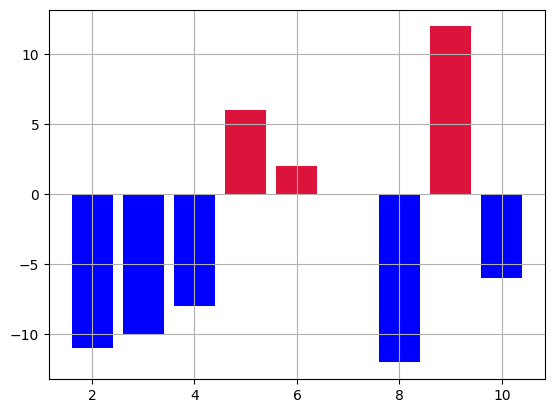

In [322]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

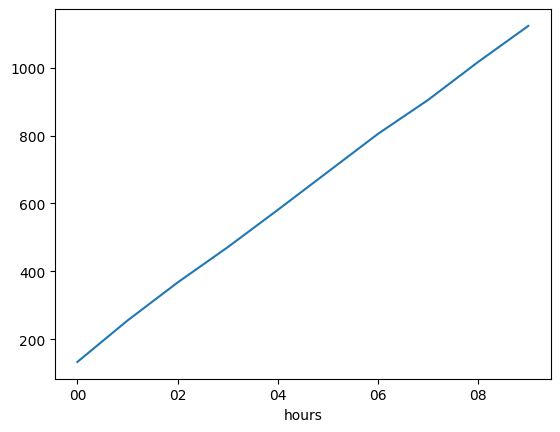

In [323]:
data.cumsum().plot()


<Axes: xlabel='hours'>

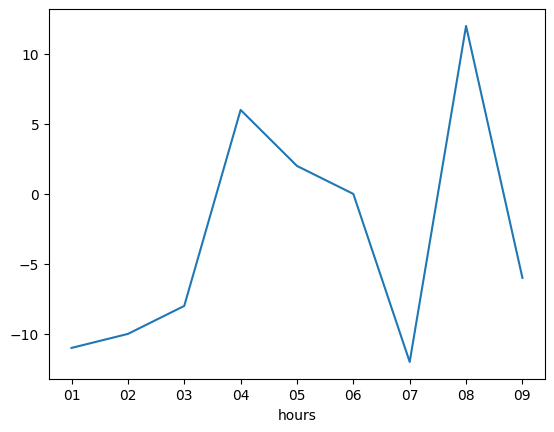

In [344]:
# evolution par heure
data.diff().plot()

In [346]:
data.diff().describe()

count     9.00000
mean     -3.00000
std       8.42615
min     -12.00000
25%     -10.00000
50%      -6.00000
75%       2.00000
max      12.00000
Name: kWh, dtype: float64

<Axes: >

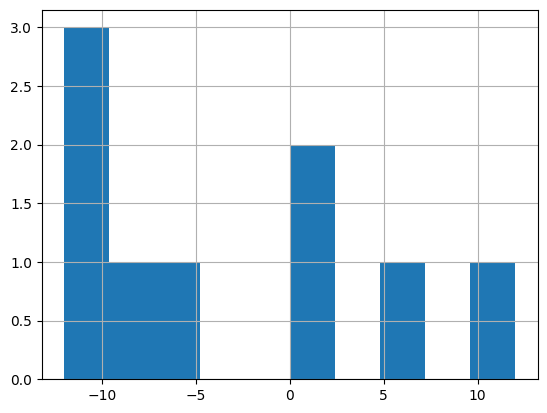

In [347]:
data.diff().hist()

# Test sauvegarde

In [325]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [326]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [327]:
#conso_byhour(day)

In [328]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


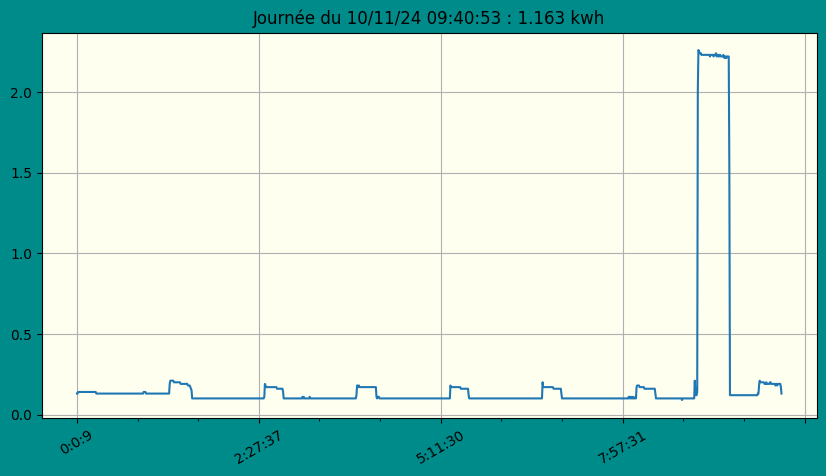

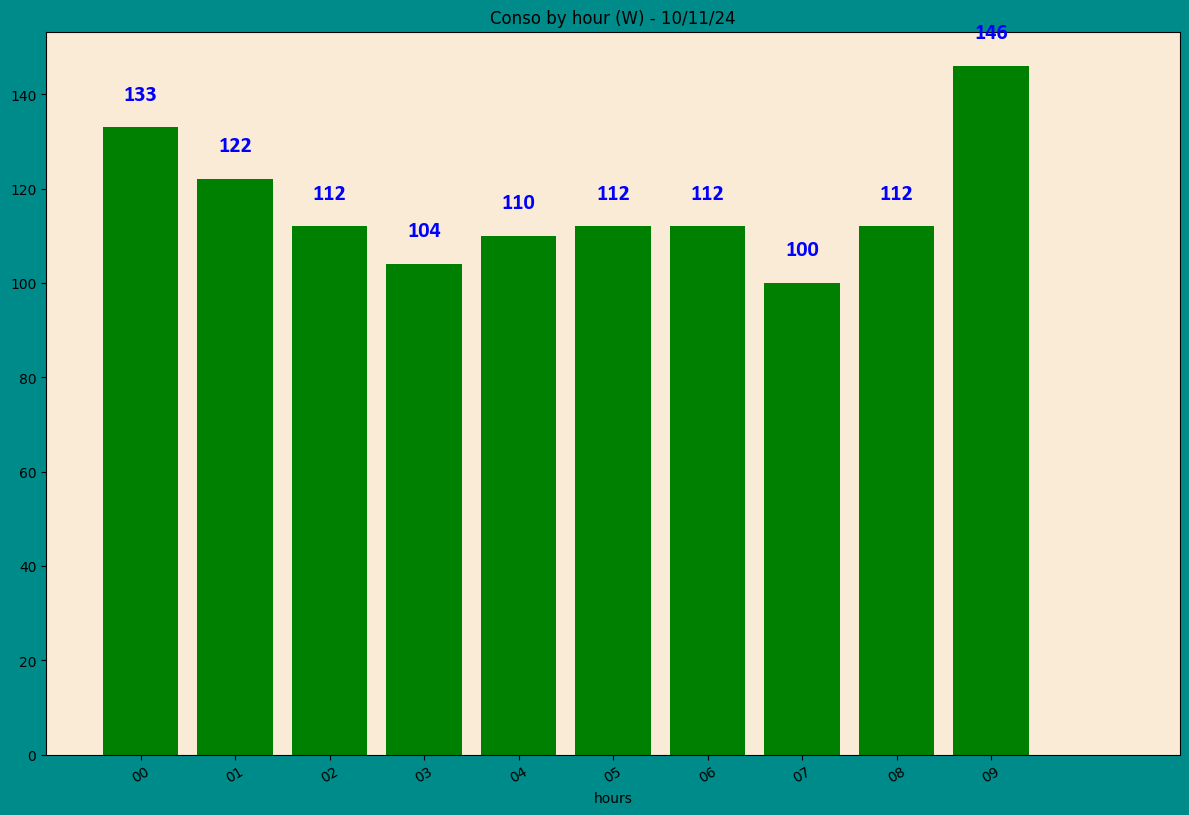

In [432]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [446]:
month.describe()


count    30.000000
mean      2.927200
std       0.914393
min       1.786000
25%       1.796750
50%       3.270500
75%       3.774000
max       4.085000
Name: kWh, dtype: float64

<Axes: >

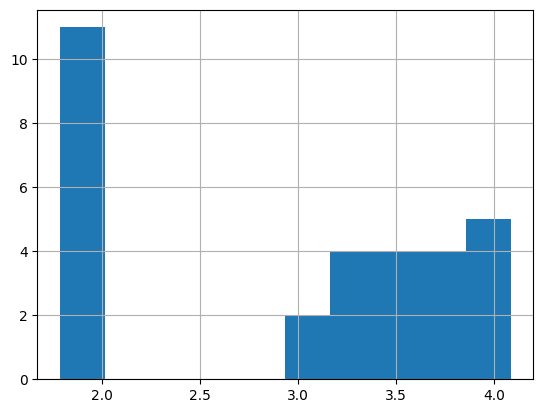

In [447]:
month.hist()

<Axes: xlabel='days'>

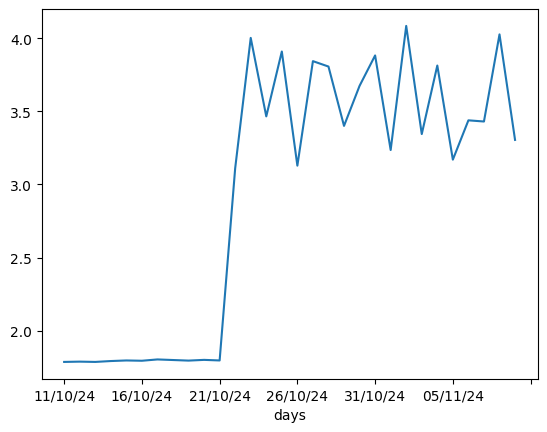

In [443]:
month.plot()

In [448]:
# date with max conso in 1 month
month.idxmax()

'02/11/24'

In [449]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'02/11/24'

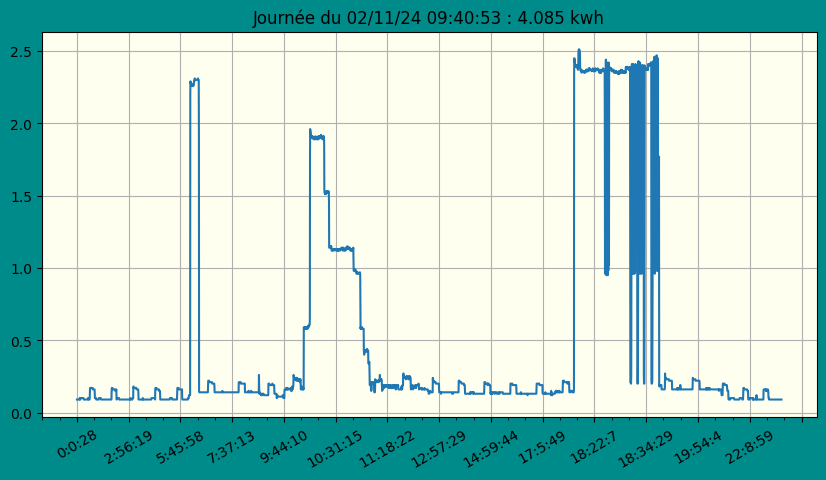

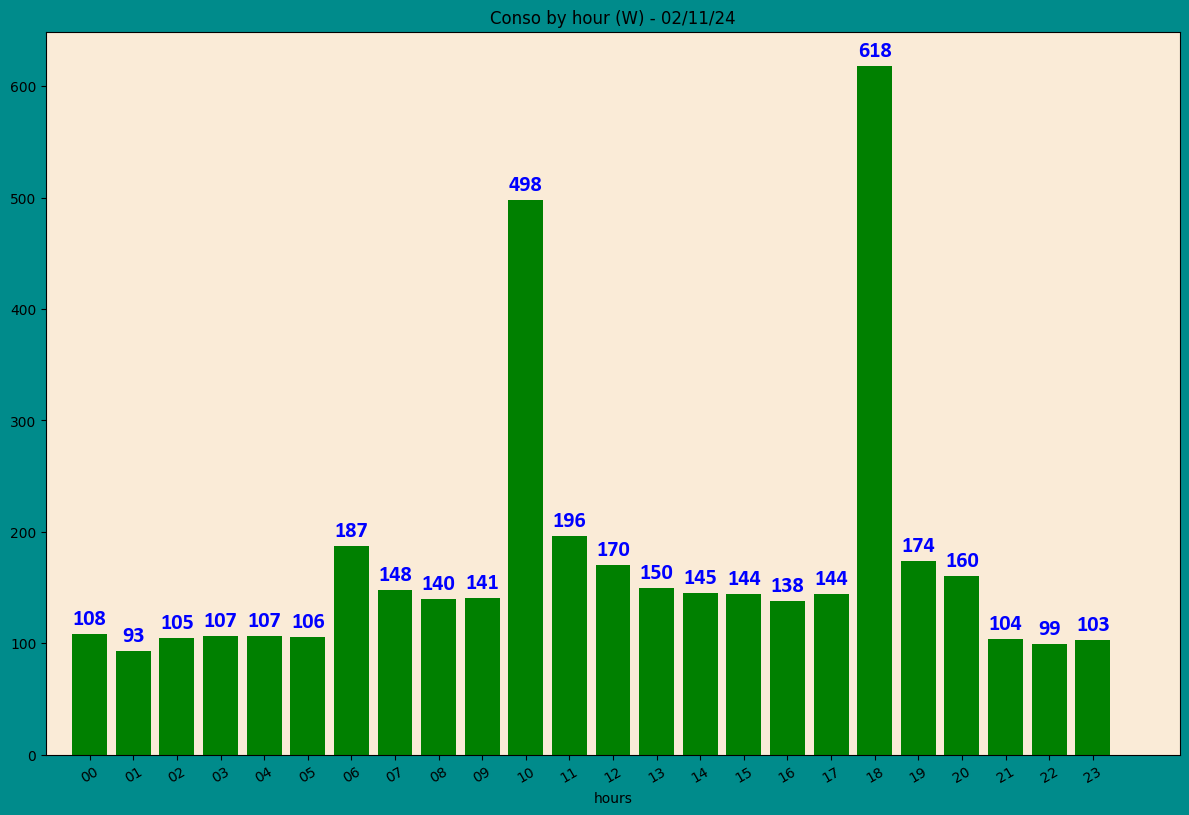

In [450]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [455]:
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      25      25    NaN
         19     249     274  224.0
         20     199     473  -50.0
         21     130     603  -69.0
         22     130     733    0.0
...             ...     ...    ...
10/11/24 05     112     693    2.0
         06     112     805    0.0
         07     100     905  -12.0
         08     112    1017   12.0
         09     146    1163   34.0

[10720 rows x 3 columns]

In [451]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff
hours,,,
00,108,108,NaN
01,93,201,-15.0
02,105,306,12.0
03,107,413,2.0
04,107,520,0.0
05,106,626,-1.0
06,187,813,81.0
07,148,961,-39.0
08,140,1101,-8.0


In [452]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff'], dtype='object')

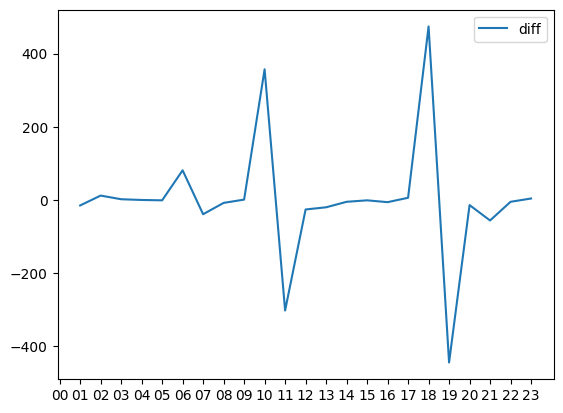

In [ ]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

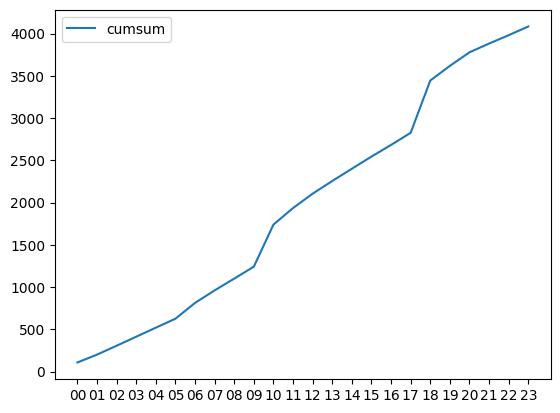

In [457]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [ ]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB